In [61]:
import keras
print(keras.__version__)

2.10.0


In [62]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [63]:
train_data.shape

(25000,)

In [64]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [65]:
train_labels[0]

1

In [66]:
word_index = imdb.get_word_index()
reverse_word_index = dict([value, key] for (key, value) in word_index.items())

In [67]:
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [68]:
# 데이터 준비
import numpy as np

def vectorrize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))

    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1

    return results

vectorrize_sequences(train_data)

# 데이터 Encording
x_train = vectorrize_sequences(train_data)
x_test = vectorrize_sequences(test_data)

In [69]:
print(x_train[0])
print(x_test[0])

[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]


In [70]:
# float type으로 변환
y_train = np.asanyarray(train_labels).astype('float32')
y_test = np.asanyarray(test_labels).astype('float32')

In [74]:
# 신경망 구축
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [75]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
            loss='binary_crossentropy', 
            metrics=['accuracy'])

c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [76]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [77]:
history = model.fit(partial_x_train, partial_y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.4912 - accuracy: 0.8045 - val_loss: 0.3714 - val_accuracy: 0.8713
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2921 - accuracy: 0.9060 - val_loss: 0.3145 - val_accuracy: 0.8775
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2165 - accuracy: 0.9305 - val_loss: 0.2761 - val_accuracy: 0.8885
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1684 - accuracy: 0.9461 - val_loss: 0.2808 - val_accuracy: 0.8861
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1386 - accuracy: 0.9561 - val_loss: 0.2914 - val_accuracy: 0.8854
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1152 - accuracy: 0.9627 - val_loss: 0.3042 - val_accuracy: 0.8831
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0942 - accuracy: 0.9729 - val_loss: 0.3400 - val_accuracy: 0.8752
Epoch 8/20
30

In [79]:
# 실험 결과 데이터를 가져온다.

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

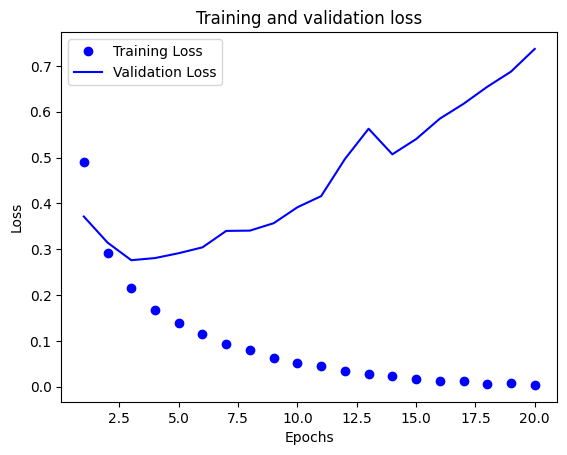

In [80]:
# 실험결과 시각화
import matplotlib.pyplot as plt

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

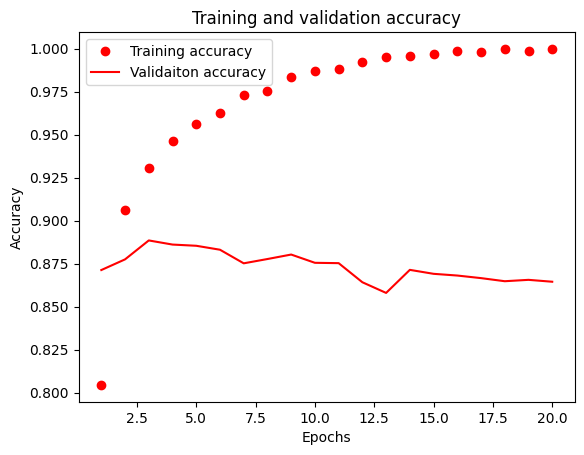

In [81]:
plt.plot(epochs, acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validaiton accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [73]:
history = model.fit(partial_x_train, partial_y_train, 
                    epochs=3, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/3
30/30 [==============================] - 1s 26ms/step - loss: 0.1830 - accuracy: 0.9385 - val_loss: 0.2852 - val_accuracy: 0.8859
Epoch 2/3
30/30 [==============================] - 0s 16ms/step - loss: 0.1441 - accuracy: 0.9543 - val_loss: 0.2811 - val_accuracy: 0.8867
Epoch 3/3
30/30 [==============================] - 0s 15ms/step - loss: 0.1172 - accuracy: 0.9639 - val_loss: 0.3025 - val_accuracy: 0.8845
